# Analysis of Features Affecting Rate of Return - Exercises

**Bartłomiej Jamiołkowski 07.12.2021**

# 1. Introduction

In [60]:
options(warn=-1)
library(SciViews)
library(ggplot2)
library(dplyr)
library(hrbrthemes)
library(nortest)
library(tseries)
library(DescTools)
library(stabledist)

In [141]:
kgh_d_2009 <- read.csv("kgh_d_2009.csv", header = TRUE)
kgh_d_2012 <- read.csv("kgh_d_2012.csv", header = TRUE)
kgh_d_2020 <- read.csv("kgh_d_2020.csv", header = TRUE)
kgh_m_2009 <- read.csv("kgh_m_2009.csv", header = TRUE)
kgh_w_2012 <- read.csv("kgh_w_2012.csv", header = TRUE)
kgh_w_2020 <- read.csv("kgh_w_2020.csv", header = TRUE)

# 2. Exercise 1

## 2.1 KGHM quotation charts (closing prices)
### 2.1.1 Daily data from 2012 - 2013

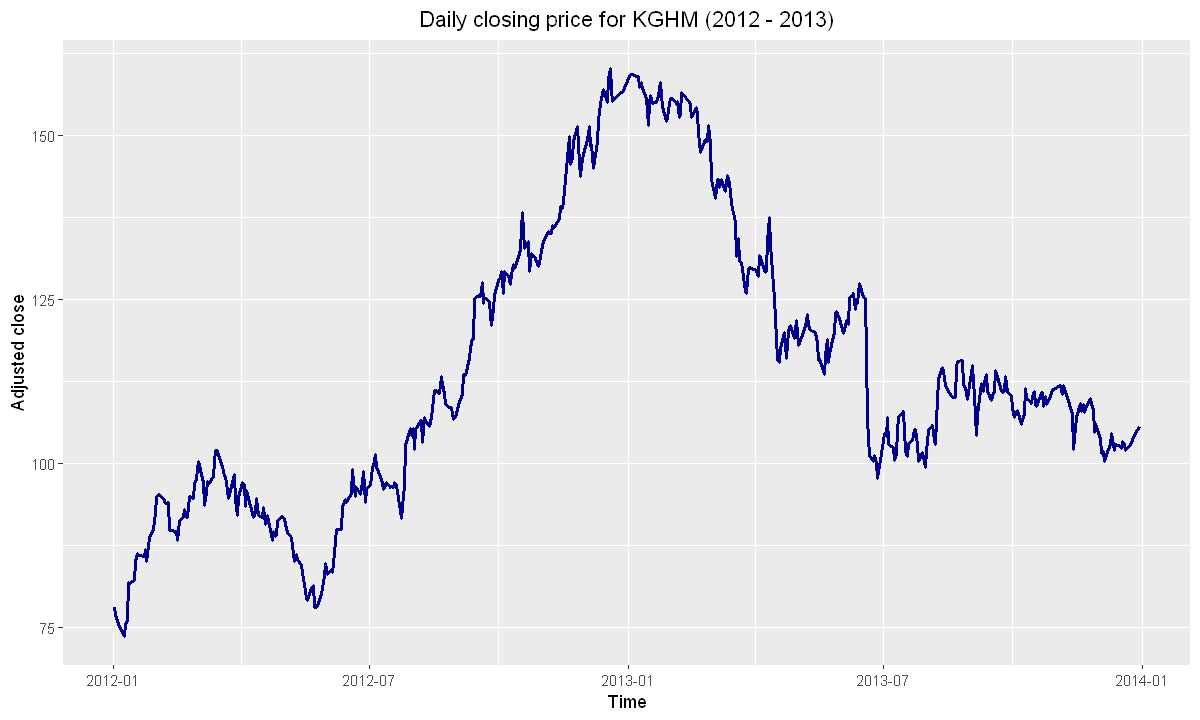

In [62]:
options(repr.plot.width=10, repr.plot.height=6)
ggplot(data = kgh_d_2012, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Daily closing price for KGHM (2012 - 2013)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

In [63]:
# Simple daily rate return 2012 - 2013
close_d_2012 <- kgh_d_2012$Close
rate_of_return_d_2012_s <- rep(0, 483)
for(i in 1:483){
  rate_of_return_d_2012_s[i] = 100 * (close_d_2012[i + 1] - close_d_2012[i])/close_d_2012[i]
}
# Logarithmic daily rate return 2012 - 2013
close_d_2012 <- kgh_d_2012$Close
rate_of_return_d_2012_l <- rep(0, 483)
for(i in 1:483){
  rate_of_return_d_2012_l[i] = 100 * log(close_d_2012[i + 1]/close_d_2012[i])
}

### 2.1.2 Weekly data for the years 2012 - 2013

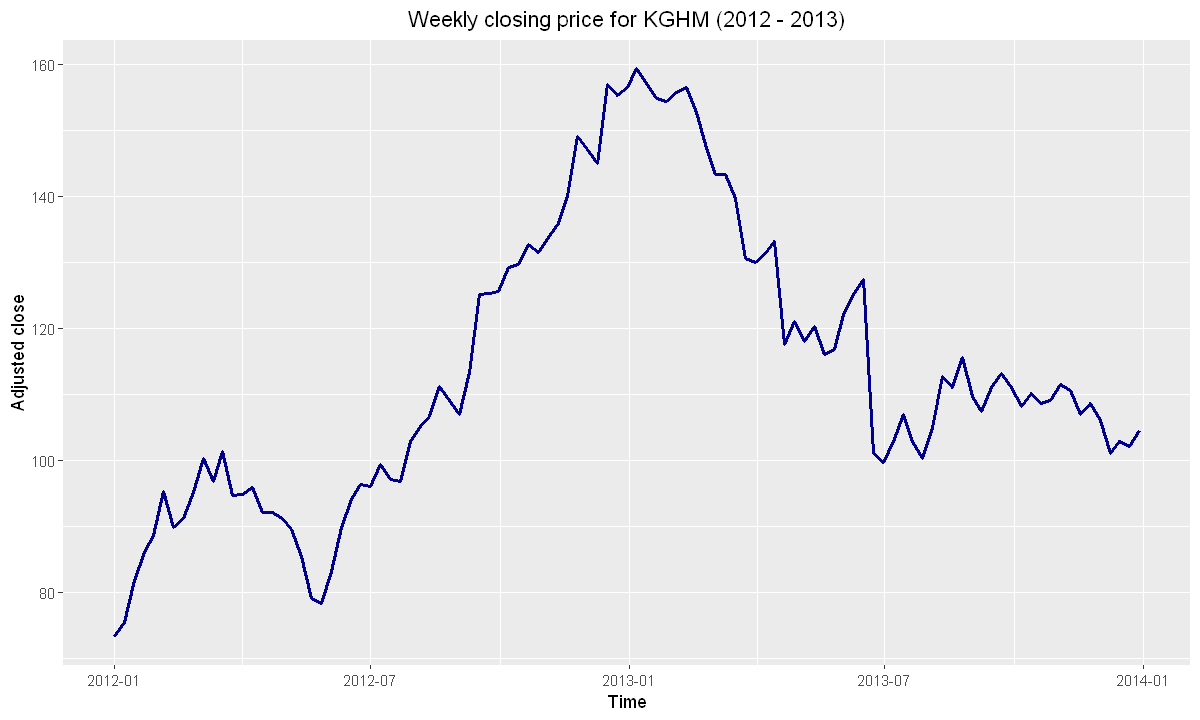

In [64]:
ggplot(data = kgh_w_2012, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Weekly closing price for KGHM (2012 - 2013)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

In [97]:
# Simple daily rate return 2012 - 2013
close_w_2012 <- kgh_w_2012$Close
rate_of_return_w_2012_s <- rep(0, 483)
for(i in 1:483){
  rate_of_return_w_2012_s[i] = 100 * (close_w_2012[i + 1] - close_w_2012[i])/close_w_2012[i]
}
# Logarithmic daily rate return 2012 - 2013
close_w_2012 <- kgh_w_2012$Close
rate_of_return_w_2012_l <- rep(0, 483)
for(i in 1:483){
  rate_of_return_w_2012_l[i] = 100 * log(close_w_2012[i + 1]/close_w_2012[i])
}

### 2.1.3 Daily data from 2020 - 2021

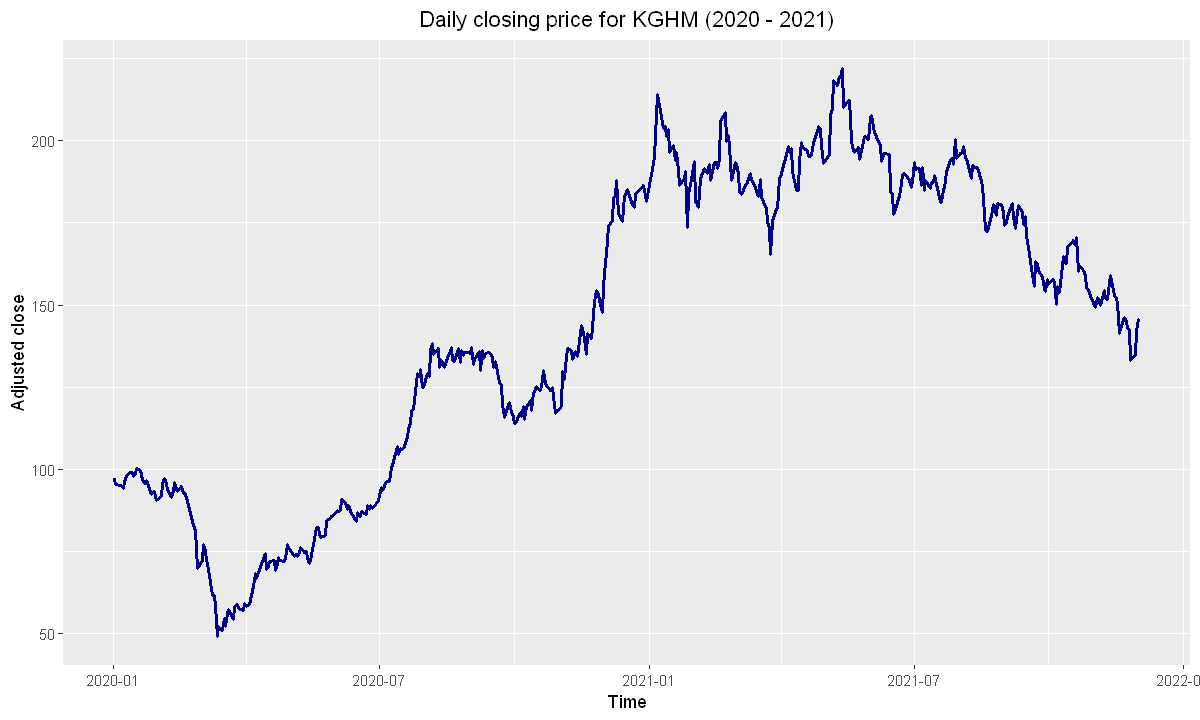

In [98]:
ggplot(data = kgh_d_2020, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Daily closing price for KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

In [99]:
# Simple daily rate return 2020 - 2021
close_d_2020 <- kgh_d_2020$Close
rate_of_return_d_2020_s <- rep(0, 483)
for(i in 1:483){
  rate_of_return_d_2020_s[i] = 100 * (close_d_2020[i + 1] - close_d_2020[i])/close_d_2020[i]
}
# Logarithmic daily rate return 2020 - 2021
close_d_2020 <- kgh_d_2020$Close
rate_of_return_d_2020_l <- rep(0, 483)
for(i in 1:483){
  rate_of_return_d_2020_l[i] = 100 * log(close_d_2020[i + 1] / close_d_2020[i])
}

### 2.1.4 Weekly data for the years 2020 - 2021

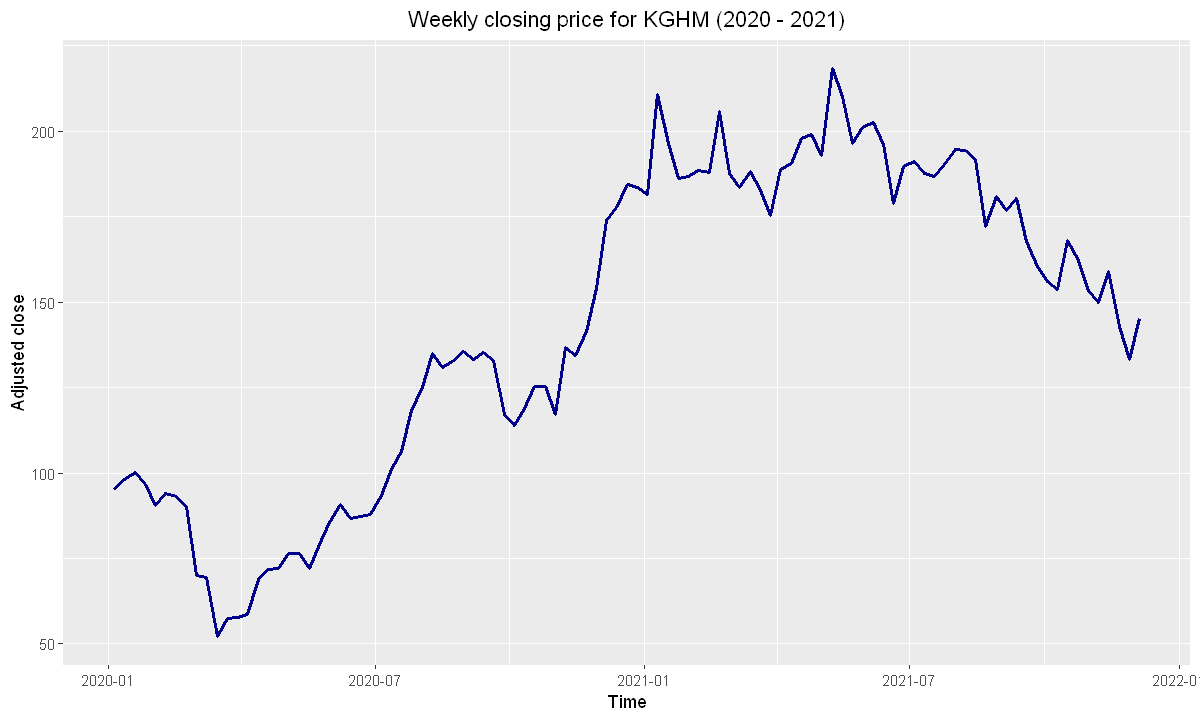

In [100]:
ggplot(data = kgh_w_2020, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Weekly closing price for KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

In [101]:
# Simple weekly rate return 2020 - 2021
close_w_2020 <- kgh_w_2020$Close
rate_of_return_w_2020_s <- rep(0, 100)
for(i in 1:100){
  rate_of_return_w_2020_s[i] = 100 * (close_w_2020[i + 1] - close_w_2020[i])/close_w_2020[i]
}
# Logarithmic weekly rate return 2020 - 2021
close_w_2020 <- kgh_w_2020$Close
rate_of_return_w_2020_l <- rep(0, 100)
for(i in 1:100){
  rate_of_return_w_2020_l[i] = 100 * log(close_w_2020[i + 1] / close_w_2020[i])
}

### 2.1.5 Monthly data from 2009 to 2021

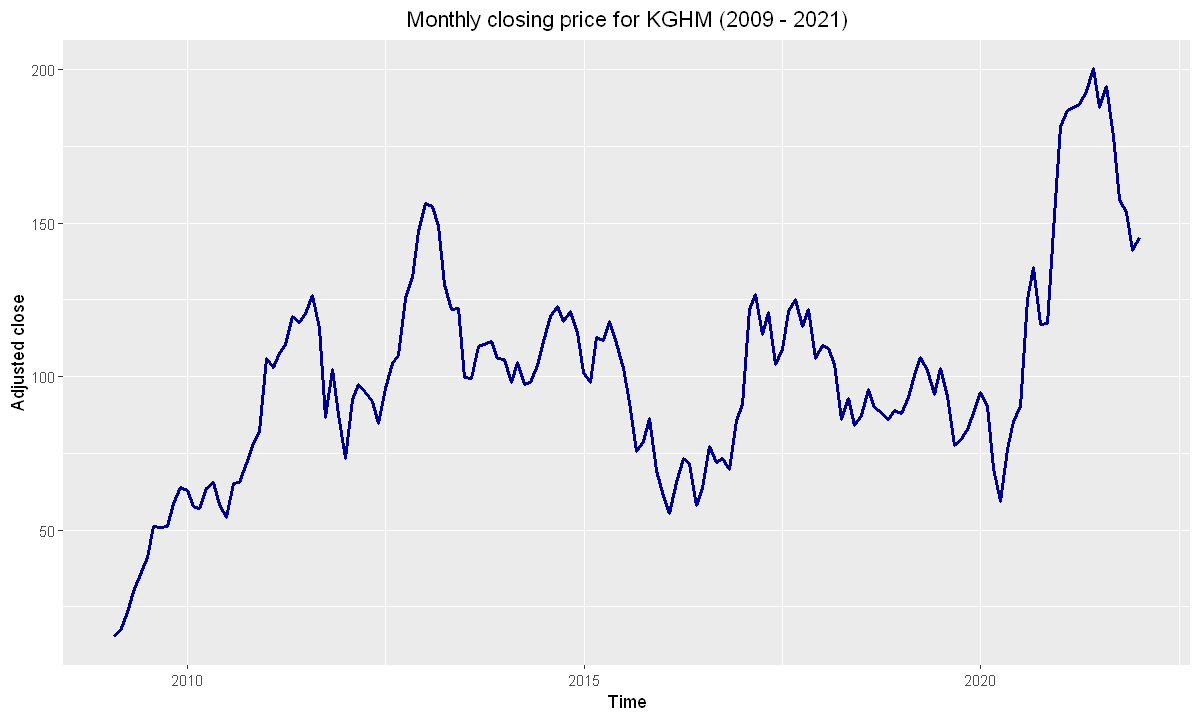

In [102]:
ggplot(data = kgh_m_2009, aes(x = as.Date(Date), y = Close)) + 
  geom_line(color = "darkblue", size = 1) +
  ggtitle("Monthly closing price for KGHM (2009 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Adjusted close") 

In [103]:
# Simple monthly rate return 2009 - 2021
close_m_2009 <- kgh_m_2009$Close
rate_of_return_m_2009_s <- rep(0, 155)
for(i in 1:155){
  rate_of_return_m_2009_s[i] = 100 * (close_m_2009[i + 1] - close_m_2009[i])/close_m_2009[i]
}
# Logarithmic monthly rate return 2009 - 2021
close_m_2009 <- kgh_m_2009$Close
rate_of_return_m_2009_l <- rep(0, 155)
for(i in 1:155){
  rate_of_return_m_2009_l[i] = 100 * log(close_m_2009[i + 1] / close_m_2009[i])
}

## 2.2 Graphs of both types of rates of return and a graph of the difference between the simple and log rate
### 2.2.1 Daily simple rate of return from 2020 to 2021

In [104]:
data1 <- data.frame(
  day = as.Date(kgh_d_2020$Date[-1]),
  value = rate_of_return_d_2020_s
)

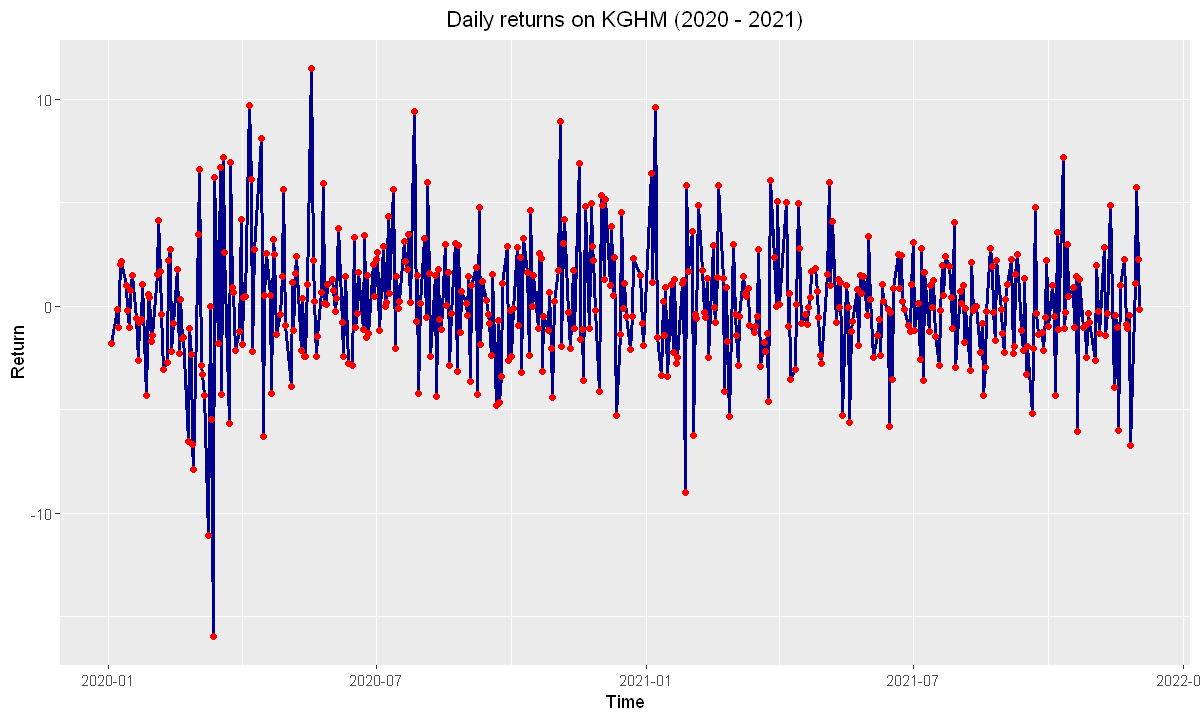

In [105]:
ggplot(data = data1, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Daily returns on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 2.2.2 Daily logarithmic rate of return from 2020 to 2021

In [106]:
data2 <- data.frame(
  day = as.Date(kgh_d_2020$Date[-1]),
  value = rate_of_return_d_2020_l
)

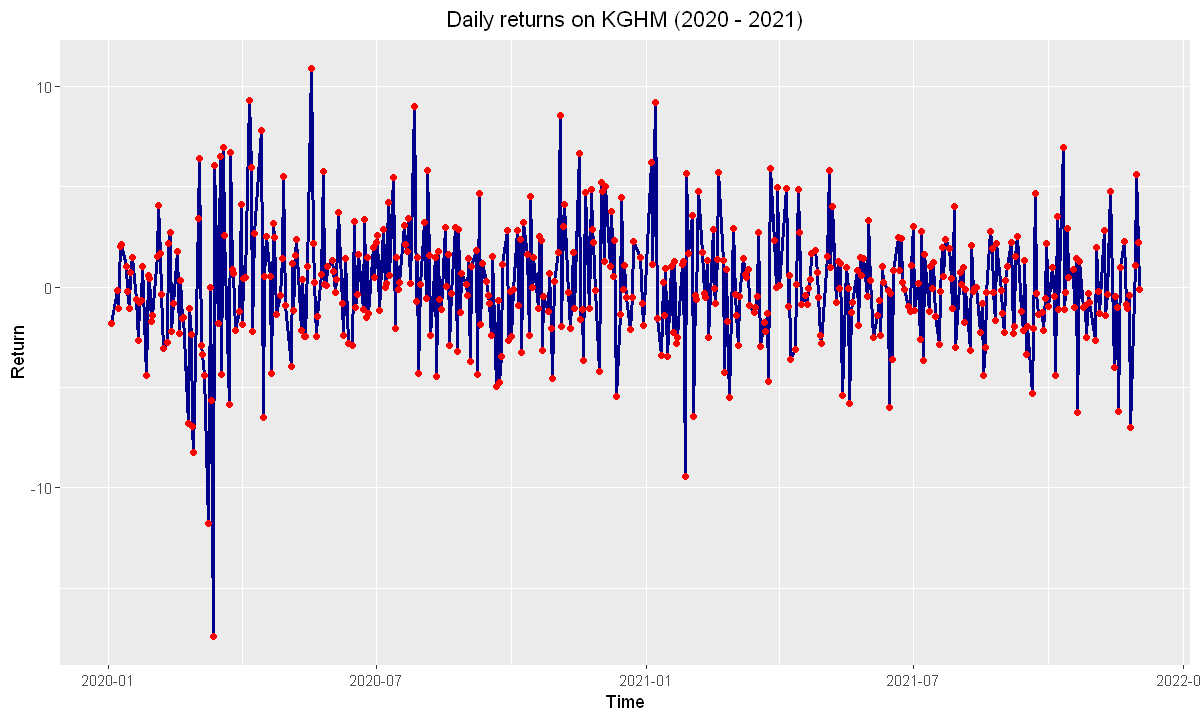

In [107]:
ggplot(data = data2, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Daily returns on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 2.2.3 The difference between the daily simple rate and the daily logarithmic rate for the years 2020-2021

In [108]:
data3 <- data.frame(
  day = as.Date(kgh_d_2020$Date[-1]),
  value = rate_of_return_d_2020_s - rate_of_return_d_2020_l
)

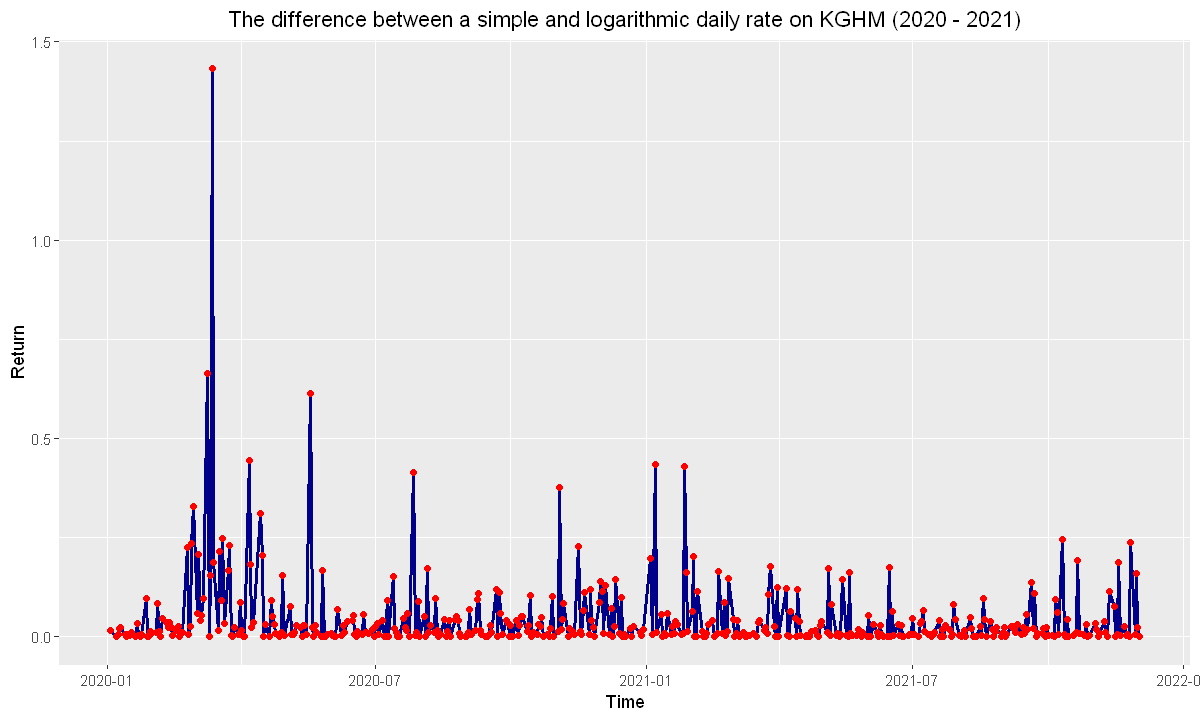

In [109]:
ggplot(data = data3, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("The difference between a simple and logarithmic daily rate on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 1.2.4 Weekly simple rate of return from 2020 to 2021

In [110]:
data4 <- data.frame(
  day = as.Date(kgh_w_2020$Date[-1]),
  value = rate_of_return_w_2020_s
)

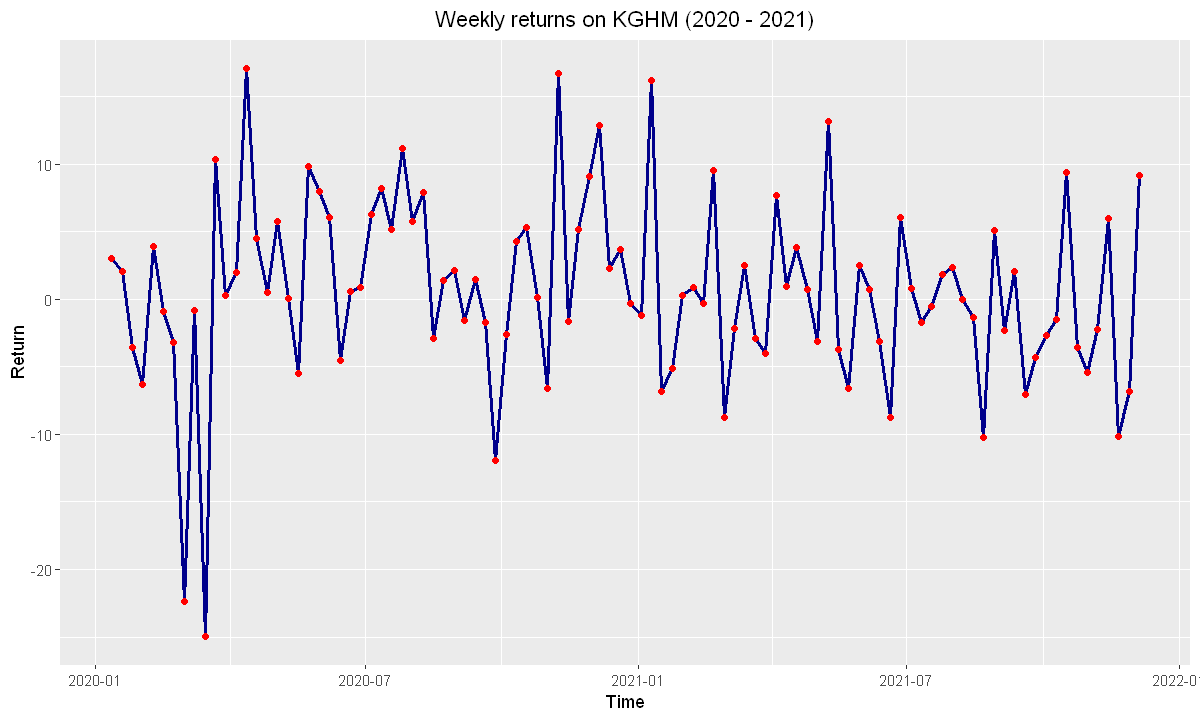

In [111]:

ggplot(data = data4, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Weekly returns on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 1.2.5 Weekly logarithmic rate of return from 2020 to 2021

In [112]:
data5 <- data.frame(
  day = as.Date(kgh_w_2020$Date[-1]),
  value = rate_of_return_w_2020_l
)

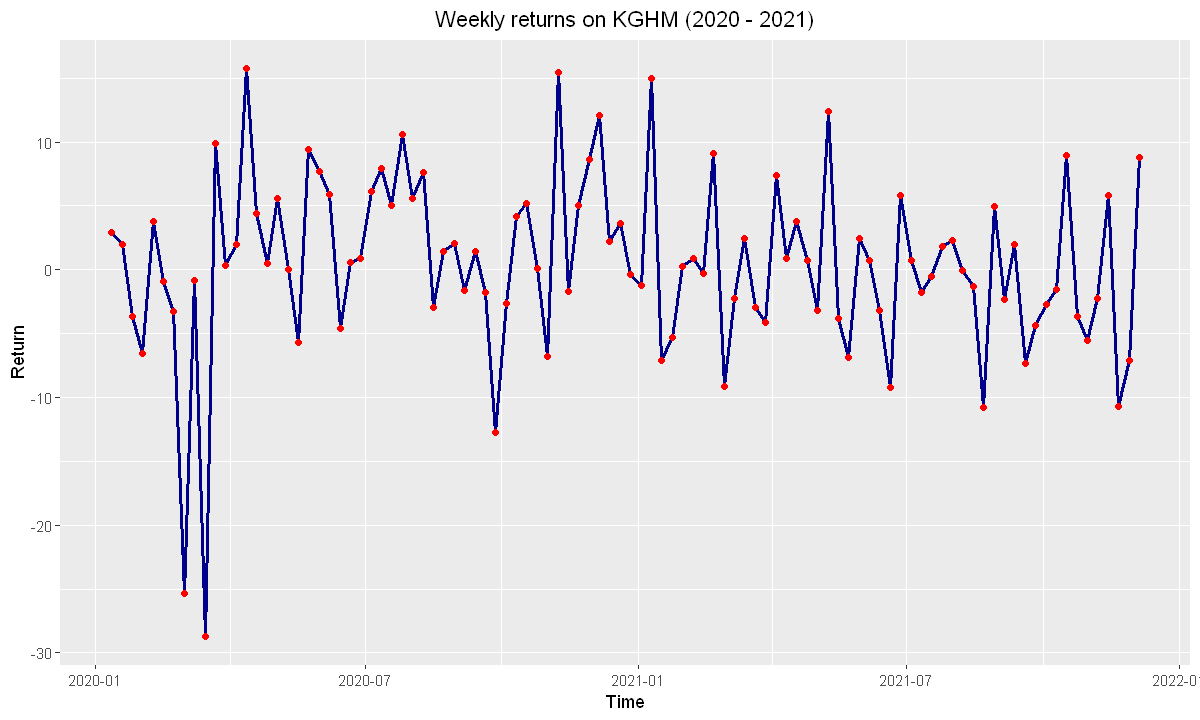

In [113]:
ggplot(data = data5, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Weekly returns on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 1.2.6 The difference between the weekly simple and logarithmic rate for the years 2020-2021

In [114]:
data6 <- data.frame(
  day = as.Date(kgh_w_2020$Date[-1]),
  value = rate_of_return_w_2020_s - rate_of_return_w_2020_l
)

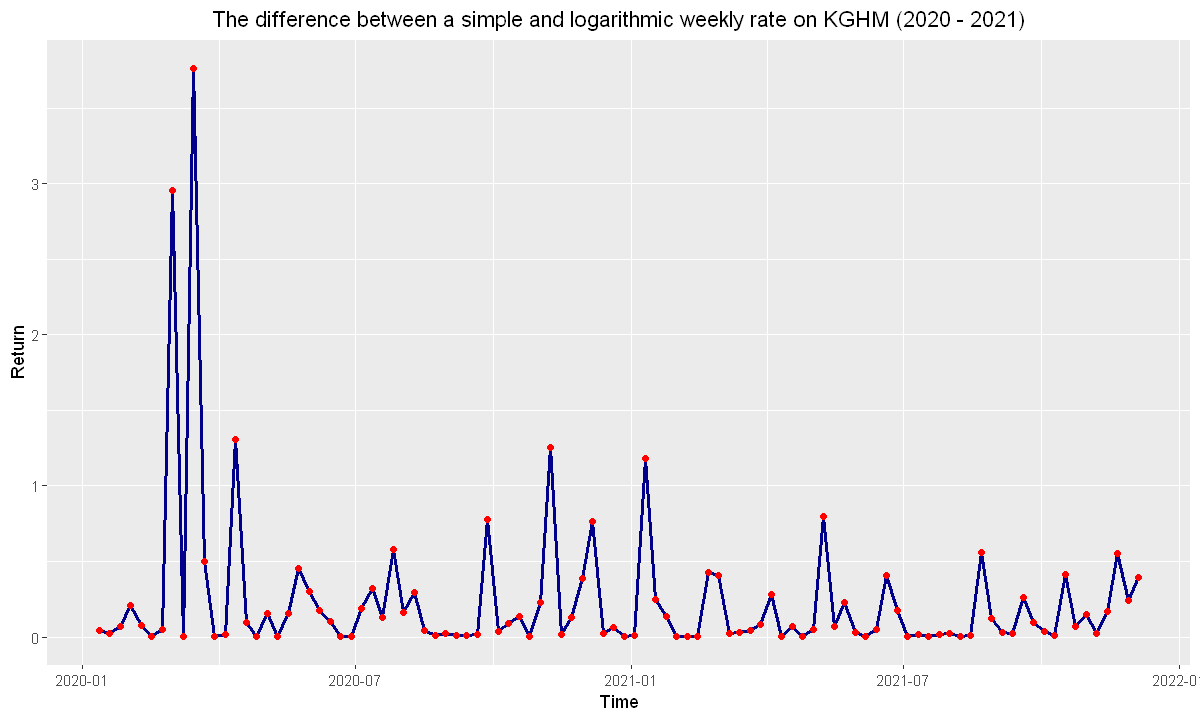

In [115]:
ggplot(data = data6, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("The difference between a simple and logarithmic weekly rate on KGHM (2020 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 1.2.7 Monthly simple rate of return from 2009 to 2021

In [116]:
data7 <- data.frame(
  day = as.Date(kgh_m_2009$Date[-1]),
  value = rate_of_return_m_2009_s
)

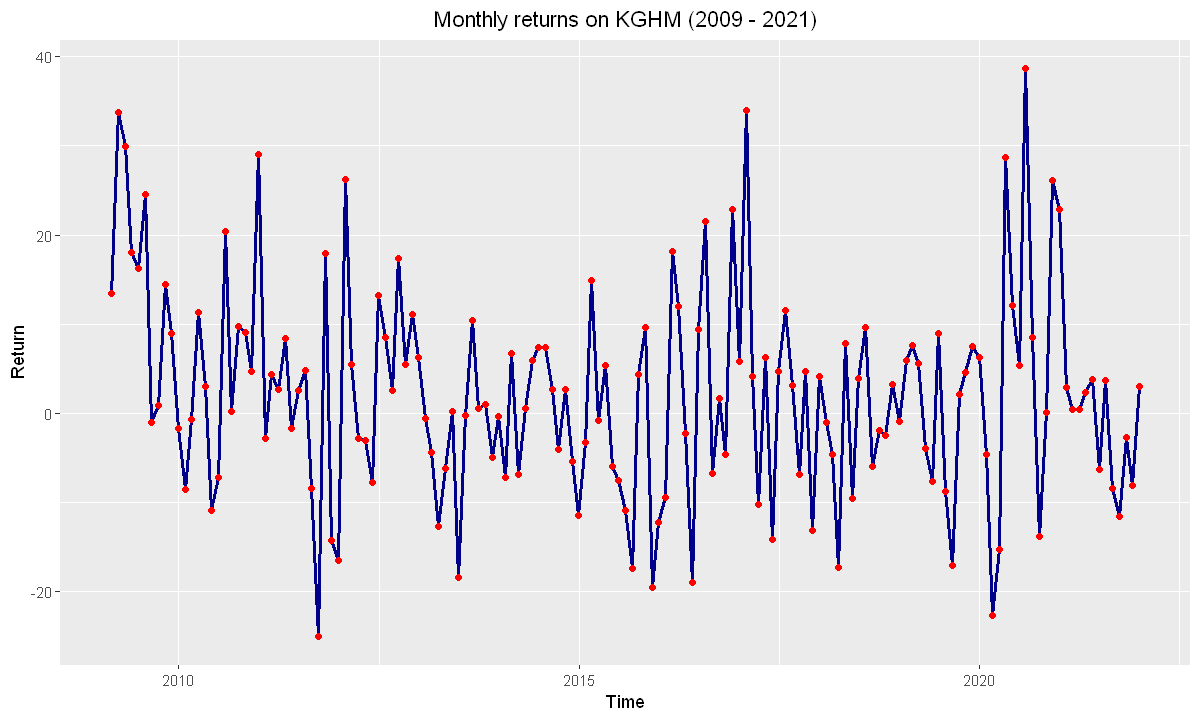

In [117]:
ggplot(data = data7, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Monthly returns on KGHM (2009 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return") 

### 1.2.8 Monthly logarithmic rate of return from 2009 to 2021

In [118]:
data8 <- data.frame(
  day = as.Date(kgh_m_2009$Date[-1]),
  value = rate_of_return_m_2009_l
)

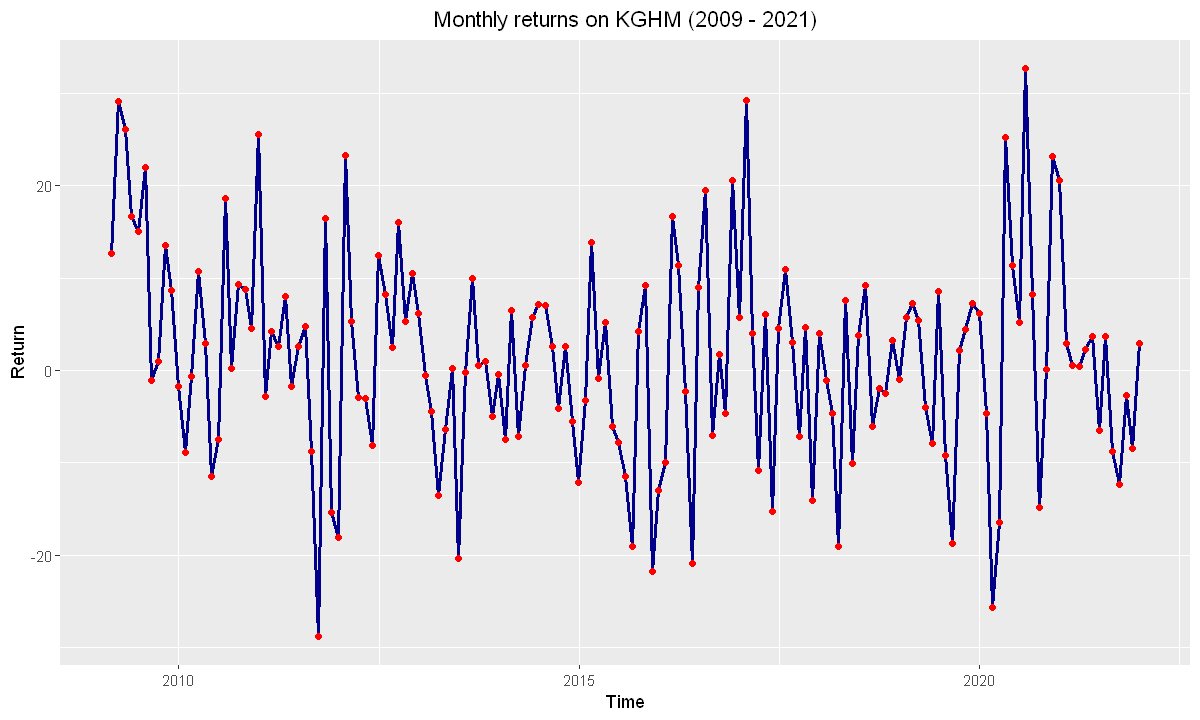

In [119]:
ggplot(data = data8, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("Monthly returns on KGHM (2009 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return")

### 1.2.9 Difference between the monthly simple and logarithmic rate for 2009-2021

In [120]:
data9 <- data.frame(
  day = as.Date(kgh_m_2009$Date[-1]),
  value = rate_of_return_m_2009_s - rate_of_return_m_2009_l
)

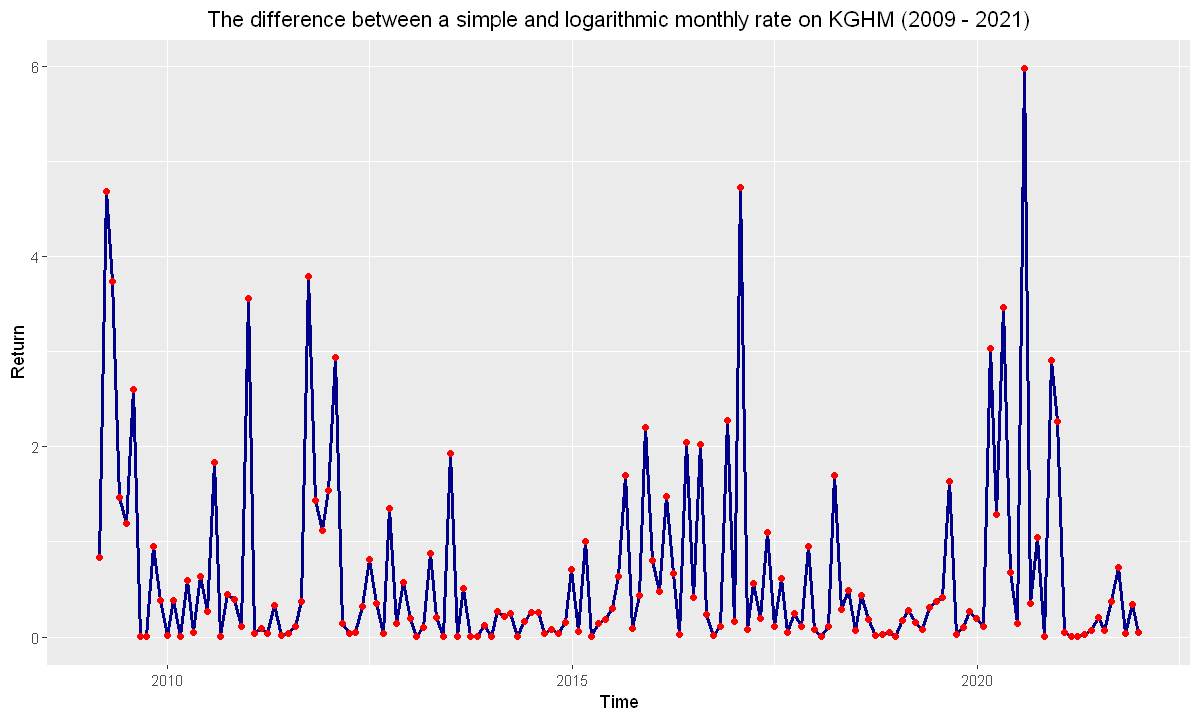

In [121]:
ggplot(data = data9, aes(x = day, y = value)) + 
  geom_line(color = "darkblue", size = 1) +
  geom_point(color="red") +
  ggtitle("The difference between a simple and logarithmic monthly rate on KGHM (2009 - 2021)") +
  theme(plot.title = element_text(hjust = 0.5)) +
  labs(x = "Time", y = "Return")

**Interpretation**

The presented graphs of the differences of the two types of returns indicate that logarithmic rates of return are always smaller than simple rates of return. As are the rates of return, t the differences are greater.

# 3. Exercise 2
## 3.1 Shapiro-Wilk test

In [122]:
# Daily logarithmic rates of return
shapiro.test(rate_of_return_d_2012_l)
shapiro.test(rate_of_return_d_2020_l)
# Weekly logarithmic rates of return
shapiro.test(rate_of_return_w_2012_l)
shapiro.test(rate_of_return_w_2020_l)
# Monthly logarithmic rates of return
shapiro.test(rate_of_return_m_2009_l)


	Shapiro-Wilk normality test

data:  rate_of_return_d_2012_l
W = 0.98522, p-value = 8.006e-05



	Shapiro-Wilk normality test

data:  rate_of_return_d_2020_l
W = 0.96729, p-value = 6.695e-09



	Shapiro-Wilk normality test

data:  rate_of_return_w_2012_l
W = 0.90782, p-value = 2.272e-06



	Shapiro-Wilk normality test

data:  rate_of_return_w_2020_l
W = 0.9374, p-value = 0.0001342



	Shapiro-Wilk normality test

data:  rate_of_return_m_2009_l
W = 0.9902, p-value = 0.3585


**Interpretation**

The study of the normality of the distribution of logarithmic rates of return is carried out in the Shapiro-Wilk test at the significance level of 0.05. The null hypothesis is the normality of the tested variable distribution.
The p-value in the first test is 8.006e-05, which is less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return from 2012-2013 is not normal.
The p-value in the second test is 6.695e-09, less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return for 2020-2021 is not normal.
The p-value in the first test is 2.272e-06, less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return from 2012-2013 is not normal.
The p-value in the first test is 0.0001342 and is less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return for 2020-2021 is not normal.
The p-value in the first test is 0.3585 and is greater than alpha, which means not rejecting the null hypothesis. The monthly rate of return for 2009-2021 has a normal distribution.


## 3.2 Anderson-Darling test

In [123]:
# Daily logarithmic rates of return
ad.test(rate_of_return_d_2012_l)
ad.test(rate_of_return_d_2020_l)
# Weekly logarithmic rates of return
ad.test(rate_of_return_w_2012_l)
ad.test(rate_of_return_w_2020_l)
# Monthly logarithmic rates of return
ad.test(rate_of_return_m_2009_l)


	Anderson-Darling normality test

data:  rate_of_return_d_2012_l
A = 1.1717, p-value = 0.004606



	Anderson-Darling normality test

data:  rate_of_return_d_2020_l
A = 2.8818, p-value = 2.971e-07



	Anderson-Darling normality test

data:  rate_of_return_w_2012_l
A = 1.0897, p-value = 0.007075



	Anderson-Darling normality test

data:  rate_of_return_w_2020_l
A = 0.98477, p-value = 0.01286



	Anderson-Darling normality test

data:  rate_of_return_m_2009_l
A = 0.56486, p-value = 0.1414


**Interpretation**

The study of the normality of the distribution of logarithmic rates of return is carried out in the Anderson-Darling test with a significance level of 0.05. The null hypothesis is the normality of the tested variable distribution.
The p-value in the first test is 0.004606 and is less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return from 2012-2013 is not normal.
The p-value in the second test is 2971e-07, less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return for 2020-2021 is not normal.
The p-value in the first test is 0.007075 and is less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return from 2012-2013 is not normal.
The p-value in the first test is 0.01286, which is less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return for 2020-2021 is not normal.
The p-value in the first test is 0.1414 and is greater than alpha, which means not rejecting the null hypothesis. The monthly rate of return distribution for 2009-2021 is normal.

## 3.3 Jarque-Bera test

In [124]:
# Daily logarithmic rates of return
jarque.bera.test(rate_of_return_d_2012_l)
jarque.bera.test(rate_of_return_d_2020_l)
# Weekly logarithmic rates of return
JarqueBeraTest(rate_of_return_w_2020_l, robust = TRUE, method = c("chisq", "mc"), N = 0, na.rm = FALSE)
jarque.bera.test(rate_of_return_w_2020_l)
# Monthly logarithmic rates of return
jarque.bera.test(rate_of_return_m_2009_l)


	Jarque Bera Test

data:  rate_of_return_d_2012_l
X-squared = 49.506, df = 2, p-value = 1.777e-11



	Jarque Bera Test

data:  rate_of_return_d_2020_l
X-squared = 209.35, df = 2, p-value < 2.2e-16



	Robust Jarque Bera Test

data:  rate_of_return_w_2020_l
X-squared = 98.392, df = 2, p-value < 2.2e-16



	Jarque Bera Test

data:  rate_of_return_w_2020_l
X-squared = 61.371, df = 2, p-value = 4.718e-14



	Jarque Bera Test

data:  rate_of_return_m_2009_l
X-squared = 0.86002, df = 2, p-value = 0.6505


**Interpretation**

The study of the normality of the distribution of logarithmic rates of return is carried out in the Jarque-Ber test at the significance level of 0.05. The null hypothesis is the normality of the tested variable distribution.
The p-value in the first test is 1.777e-11i is less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return from 2012-2013 is not normal.
The p-value in the second test is 2.2e-16, less than alpha, which means rejecting the null hypothesis. The distribution of the daily rate of return for 2020-2021 is not normal.
The p-value in the first test is 2.2e-16, less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return from 2012-2013 is not normal.
The p-value in the first test is 4.718e-14, less than alpha, which means rejecting the null hypothesis. The distribution of the weekly rate of return for 2020-2021 is not normal.
The p-value in the first test is 0.6505 and is greater than alpha, which means not rejecting the null hypothesis. The monthly rate of return distribution for 2009-2021 is normal.

**The presented results show that the daily and weekly logatrhythmic rates of return do not have a normal distribution. Monthly rates of return can be normally staggered due to the central limit theorem**

# 4. Exercise 3

In [147]:
data0 <- as.data.frame(kgh_d_2009) 
close_d_2009 <- rev(data0$Ostatnio)
close_d_2009 <- as.double(factor(close_d_2009))
rate_of_return_d_2009_l <- rep(0, 3040)
for(i in 1:3040){
  rate_of_return_d_2009_l[i] = 100 * log(close_d_2009[i + 1]/close_d_2009[i])
}

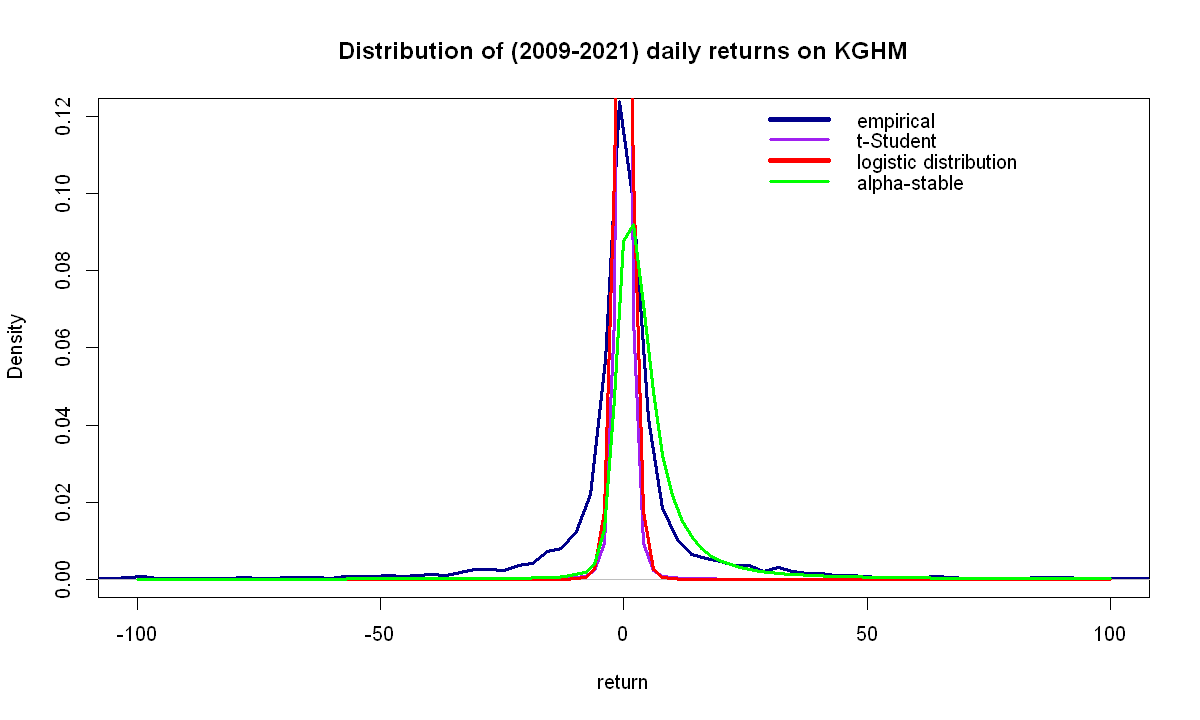

In [148]:
plot(density(rate_of_return_d_2009_l),col='darkblue',lwd=3,main='Distribution of (2009-2021) daily returns on KGHM', xlim = c(-100, 100), ylim = c(0, 0.12), xlab = "return")
curve(dt(x, df = 3),add=TRUE,col='purple',lwd=3)
curve(dlogis(x),add=TRUE,col='red',lwd=3)
curve(dstable(x, alpha=1.2, beta = .8, gamma = 3, delta = 2), -100, 100, col="green", lwd=3,add=TRUE)
legend("topright",bg='white',bty="n",cex=1,lty=1,lwd=c(4,3),
       c('empirical','t-Student','logistic distribution','alpha-stable'),col=c('darkblue','purple','red','green'))

**Interpretation**

When analyzing the graph, it can be noticed that the alpha-stable distribution would fit best to the rate of return distribution.